### Global setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from import_data import *
from utils import *
from recuit_simule import *

In [3]:
prefix = '../Data/'

In [4]:
cust_file = '2_detail_table_customers.xls'
df_custs = pd.read_excel(prefix + cust_file)

In [5]:
vehicles_file = '3_detail_table_vehicles.xls'
df_vehicles = pd.read_excel(prefix + vehicles_file)

In [6]:
depots_file = '4_detail_table_depots.xls'
df_depots = pd.read_excel(prefix + depots_file)

depot_lat = df_depots['DEPOT_LATITUDE'][0]
depot_long = df_depots['DEPOT_LONGITUDE'][0]

In [7]:
constraints_file = '5_detail_table_constraints_sdvrp.xls'
df_constraints = pd.read_excel(prefix + constraints_file)

In [8]:
custs_depots_distances_file = '6_detail_table_cust_depots_distances.xls'
df_custDepotsDistances = pd.read_excel(prefix + custs_depots_distances_file)

### Génération d'une solution initiale

In [9]:
data = coordinates(cust_file, depots_file)
coord_dict = coord_to_dict(data)

vehicle_capacity = 50
n_vehicules = (len(data) - 1)//vehicle_capacity + 1

s_init = gen_init_sol(cust_file, depots_file, vehicle_capacity)

### Recuit algorithm

In [10]:
nb_iter = 100
temp_i = 10
cooling_coeff = 0.8

sol_RS = recuit_simule(s_init, coord_dict, temp_i, nb_iter, cooling_coeff)

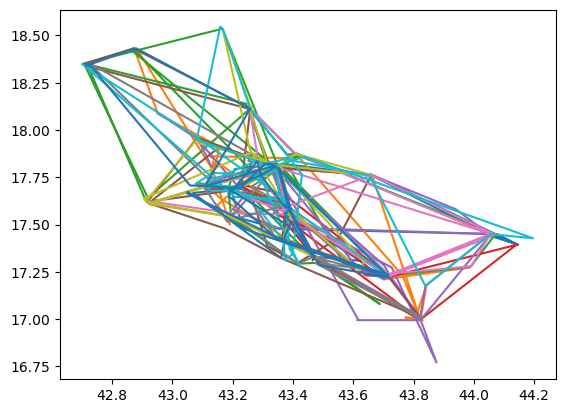

In [11]:
X = [] 
Y = []
for cycle in sol_RS[1]:
    for code in cycle:
        lat, long = find_coords_from_code(code, coord_dict)
        X.append(lat)
        Y.append(long)

    plt.plot(X, Y)
    X = []
    Y = []

plt.show()